## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.539671 -1.485203 -0.562061 -1.535213  0.314767 -2.017002
1 -1.426175  0.606811  0.637646 -0.958147 -0.109074 -1.345432
2 -0.440690 -0.828680  0.701090  0.791909  1.178106  0.207187
3 -1.435446  1.234903 -0.783257  0.520645 -0.684851 -0.748200
4  1.625661  1.370491  1.004818 -0.552928  0.103165 -0.366005


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9662224	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.9560529	total: 69.4ms	remaining: 34.6s
2:	learn: 0.9444998	total: 70ms	remaining: 23.3s
3:	learn: 0.9339586	total: 70.5ms	remaining: 17.6s
4:	learn: 0.9234303	total: 71.1ms	remaining: 14.2s
5:	learn: 0.9126677	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9007666	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8914136	total: 72.8ms	remaining: 9.03s
8:	learn: 0.8823735	total: 73.3ms	remaining: 8.07s
9:	learn: 0.8721919	total: 73.8ms	remaining: 7.31s
10:	learn: 0.8614116	total: 74.5ms	remaining: 6.69s
11:	learn: 0.8523205	total: 75ms	remaining: 6.17s
12:	learn: 0.8428917	total: 75.6ms	remaining: 5.74s
13:	learn: 0.8343777	total: 76ms	remaining: 5.35s
14:	learn: 0.8257595	total: 76.5ms	remaining: 5.03s
15:	learn: 0.8186370	total: 77ms	remaining: 4.74s
16:	learn: 0.8100783	total: 77.6ms	remaining: 4.49s
17:	learn: 0.8024589	total: 78ms	remaining: 4.26s
18:	learn: 0.7955101	total: 78.6ms	remaining: 4.06s
19

85:	learn: 0.4032622	total: 109ms	remaining: 1.16s
86:	learn: 0.3999286	total: 109ms	remaining: 1.15s
87:	learn: 0.3961711	total: 110ms	remaining: 1.14s
88:	learn: 0.3929474	total: 110ms	remaining: 1.13s
89:	learn: 0.3899405	total: 110ms	remaining: 1.12s
90:	learn: 0.3864551	total: 111ms	remaining: 1.11s
91:	learn: 0.3825898	total: 111ms	remaining: 1.1s
92:	learn: 0.3786709	total: 113ms	remaining: 1.1s
93:	learn: 0.3750433	total: 113ms	remaining: 1.09s
94:	learn: 0.3713921	total: 113ms	remaining: 1.08s
95:	learn: 0.3679939	total: 114ms	remaining: 1.07s
96:	learn: 0.3647398	total: 114ms	remaining: 1.06s
97:	learn: 0.3613745	total: 115ms	remaining: 1.05s
98:	learn: 0.3578045	total: 115ms	remaining: 1.05s
99:	learn: 0.3545814	total: 115ms	remaining: 1.04s
100:	learn: 0.3513694	total: 116ms	remaining: 1.03s
101:	learn: 0.3484772	total: 116ms	remaining: 1.02s
102:	learn: 0.3449868	total: 117ms	remaining: 1.01s
103:	learn: 0.3417838	total: 117ms	remaining: 1.01s
104:	learn: 0.3395139	total: 

248:	learn: 0.1120578	total: 188ms	remaining: 566ms
249:	learn: 0.1114288	total: 188ms	remaining: 564ms
250:	learn: 0.1106241	total: 188ms	remaining: 562ms
251:	learn: 0.1099097	total: 189ms	remaining: 561ms
252:	learn: 0.1091111	total: 189ms	remaining: 559ms
253:	learn: 0.1082787	total: 190ms	remaining: 557ms
254:	learn: 0.1074183	total: 190ms	remaining: 556ms
255:	learn: 0.1067960	total: 191ms	remaining: 554ms
256:	learn: 0.1060032	total: 191ms	remaining: 553ms
257:	learn: 0.1054451	total: 192ms	remaining: 551ms
258:	learn: 0.1046933	total: 192ms	remaining: 549ms
259:	learn: 0.1039084	total: 192ms	remaining: 548ms
260:	learn: 0.1034185	total: 193ms	remaining: 546ms
261:	learn: 0.1027247	total: 193ms	remaining: 545ms
262:	learn: 0.1020380	total: 194ms	remaining: 543ms
263:	learn: 0.1014708	total: 194ms	remaining: 541ms
264:	learn: 0.1006751	total: 195ms	remaining: 540ms
265:	learn: 0.0999248	total: 195ms	remaining: 538ms
266:	learn: 0.0993837	total: 196ms	remaining: 537ms
267:	learn: 

479:	learn: 0.0326784	total: 292ms	remaining: 317ms
480:	learn: 0.0324779	total: 293ms	remaining: 316ms
481:	learn: 0.0323898	total: 293ms	remaining: 315ms
482:	learn: 0.0322608	total: 294ms	remaining: 315ms
483:	learn: 0.0320841	total: 294ms	remaining: 314ms
484:	learn: 0.0319386	total: 295ms	remaining: 313ms
485:	learn: 0.0318478	total: 295ms	remaining: 312ms
486:	learn: 0.0317589	total: 296ms	remaining: 312ms
487:	learn: 0.0316804	total: 296ms	remaining: 311ms
488:	learn: 0.0315546	total: 297ms	remaining: 310ms
489:	learn: 0.0314660	total: 297ms	remaining: 309ms
490:	learn: 0.0312983	total: 297ms	remaining: 308ms
491:	learn: 0.0311752	total: 298ms	remaining: 308ms
492:	learn: 0.0310592	total: 298ms	remaining: 307ms
493:	learn: 0.0309705	total: 299ms	remaining: 306ms
494:	learn: 0.0308086	total: 299ms	remaining: 305ms
495:	learn: 0.0306886	total: 300ms	remaining: 304ms
496:	learn: 0.0306128	total: 300ms	remaining: 304ms
497:	learn: 0.0304948	total: 300ms	remaining: 303ms
498:	learn: 

641:	learn: 0.0177138	total: 371ms	remaining: 207ms
642:	learn: 0.0176703	total: 372ms	remaining: 206ms
643:	learn: 0.0176031	total: 372ms	remaining: 206ms
644:	learn: 0.0175430	total: 372ms	remaining: 205ms
645:	learn: 0.0175098	total: 373ms	remaining: 204ms
646:	learn: 0.0174159	total: 374ms	remaining: 204ms
647:	learn: 0.0173714	total: 374ms	remaining: 203ms
648:	learn: 0.0173089	total: 374ms	remaining: 202ms
649:	learn: 0.0172440	total: 375ms	remaining: 202ms
650:	learn: 0.0172004	total: 375ms	remaining: 201ms
651:	learn: 0.0171574	total: 376ms	remaining: 200ms
652:	learn: 0.0171318	total: 376ms	remaining: 200ms
653:	learn: 0.0170608	total: 376ms	remaining: 199ms
654:	learn: 0.0169805	total: 377ms	remaining: 199ms
655:	learn: 0.0169177	total: 377ms	remaining: 198ms
656:	learn: 0.0168757	total: 378ms	remaining: 197ms
657:	learn: 0.0167864	total: 379ms	remaining: 197ms
658:	learn: 0.0167311	total: 379ms	remaining: 196ms
659:	learn: 0.0166727	total: 379ms	remaining: 195ms
660:	learn: 

856:	learn: 0.0085248	total: 477ms	remaining: 79.5ms
857:	learn: 0.0084858	total: 477ms	remaining: 79ms
858:	learn: 0.0084507	total: 478ms	remaining: 78.4ms
859:	learn: 0.0084198	total: 478ms	remaining: 77.9ms
860:	learn: 0.0083837	total: 479ms	remaining: 77.3ms
861:	learn: 0.0083522	total: 479ms	remaining: 76.8ms
862:	learn: 0.0083365	total: 480ms	remaining: 76.2ms
863:	learn: 0.0083007	total: 480ms	remaining: 75.6ms
864:	learn: 0.0082646	total: 481ms	remaining: 75ms
865:	learn: 0.0082370	total: 481ms	remaining: 74.5ms
866:	learn: 0.0082017	total: 482ms	remaining: 73.9ms
867:	learn: 0.0081863	total: 482ms	remaining: 73.4ms
868:	learn: 0.0081461	total: 483ms	remaining: 72.8ms
869:	learn: 0.0081223	total: 483ms	remaining: 72.2ms
870:	learn: 0.0080933	total: 484ms	remaining: 71.6ms
871:	learn: 0.0080704	total: 484ms	remaining: 71.1ms
872:	learn: 0.0080479	total: 485ms	remaining: 70.5ms
873:	learn: 0.0080192	total: 485ms	remaining: 69.9ms
874:	learn: 0.0079827	total: 486ms	remaining: 69.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

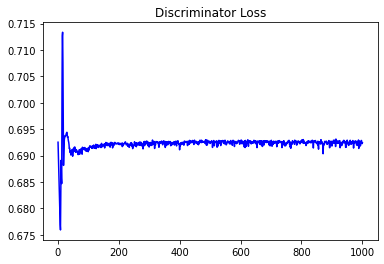

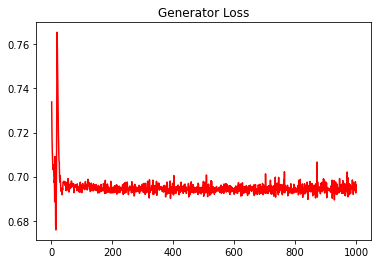

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.01927873353458573


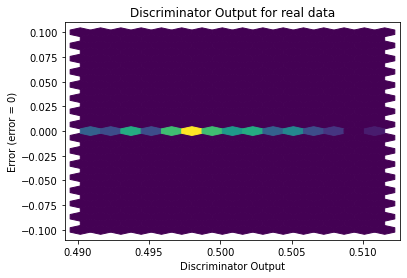

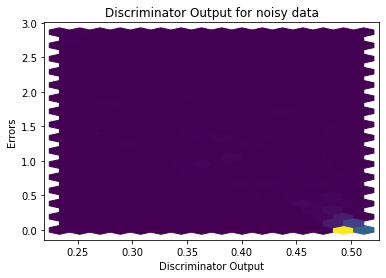

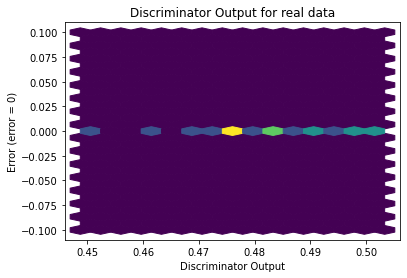

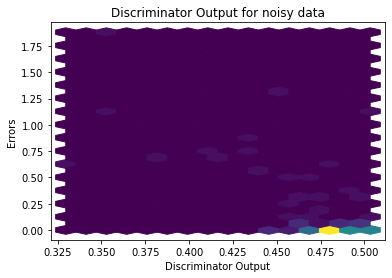

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


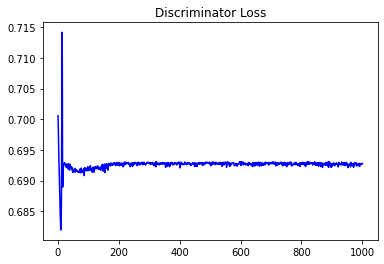

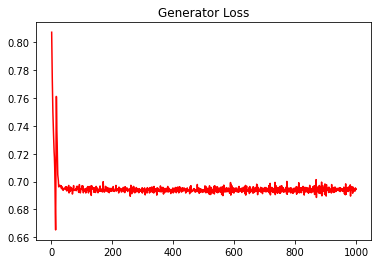

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.047318923824530734


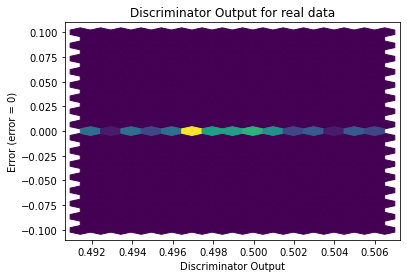

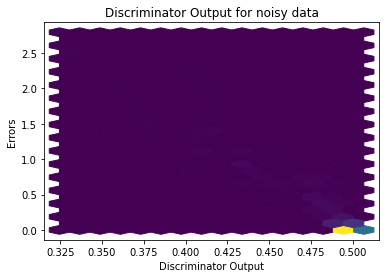

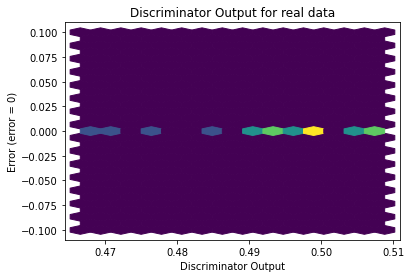

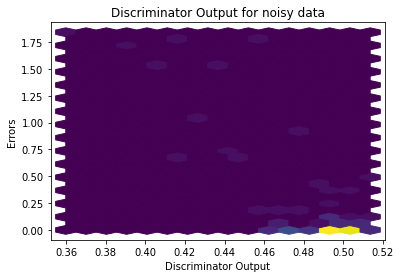

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9483]], requires_grad=True)
